In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt 
import plotly.graph_objects as go

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Setting Fonts
xfont = {'family': 'serif',
'color': 'k',
'weight': 'bold',
'size': 12,
}

yfont = {'family': 'serif',
'color': 'k',
'weight': 'bold',
'size': 12,
}
title_font = {'family': 'serif',
'color': 'k',
'weight': 'bold',
'size': 14,
'style':'normal'
}
legend_prop = {
'weight':'semibold',
'size':12,
'style':'italic'
}
highlight = {
'family': 'serif',
'color': 'darkviolet',
'weight': 'bold',
'size': 12,
}

In [4]:
df=pd.read_csv('dressreview.csv')
df.head()

s.no  age   division_name department_name class_name  clothing_id  \
0     0   40         General         Bottoms      Jeans         1028   
1     1   62  General Petite            Tops    Blouses          850   
2     2   47  General Petite         Bottoms     Skirts          993   
3     3   45  General Petite         Bottoms      Pants         1068   
4     4   37       Initmates        Intimate       Swim           24   

                    title                                        review_text  \
0    Amazing fit and wash  Like other reviewers i was hesitant to spend t...   
1      Lovely and unique!  As is true of a bunch of the fall clothing pho...   
2                     Meh  I so wanted this skirt to work, love the desig...   
3                     Wow  Love love this! i was hesitant to buy this at ...   
4  Great for bigger busts  I absolutely love the retro look of this swims...   

   alike_feedback_count  rating  recommend_index   
0                     0       5                 1  
1                    12       5                 1  
2                     3       1                 0  
3                     0       5                 1  
4                     0       5                 1

In [5]:
df.columns

Index(['s.no', 'age', 'division_name', 'department_name', 'class_name',
       'clothing_id', 'title', 'review_text', 'alike_feedback_count', 'rating',
       'recommend_index '],
      dtype='object')

In [6]:
df.shape

(23486, 11)

## Remove Unnecessary Features¶

In [7]:
df = df.drop(['s.no', 'clothing_id'], axis=1)
df.head()

age   division_name department_name class_name                   title  \
0   40         General         Bottoms      Jeans    Amazing fit and wash   
1   62  General Petite            Tops    Blouses      Lovely and unique!   
2   47  General Petite         Bottoms     Skirts                     Meh   
3   45  General Petite         Bottoms      Pants                     Wow   
4   37       Initmates        Intimate       Swim  Great for bigger busts   

                                         review_text  alike_feedback_count  \
0  Like other reviewers i was hesitant to spend t...                     0   
1  As is true of a bunch of the fall clothing pho...                    12   
2  I so wanted this skirt to work, love the desig...                     3   
3  Love love this! i was hesitant to buy this at ...                     0   
4  I absolutely love the retro look of this swims...                     0   

   rating  recommend_index   
0       5                 1  
1       5                 1  
2       1                 0  
3       5                 1  
4       5                 1

##  Division name and their counts

In [8]:
divisionname_counts=df['division_name'].value_counts()
df1=pd.DataFrame(divisionname_counts)
df1=df1.reset_index()
df1.columns=['Divisionname','counts']

In [9]:
fig = px.pie(df1, values='counts', names='Divisionname',title='Division Name and their Counts',
             color='Divisionname',
    color_discrete_map={'General':'#c51b8a',
                        'General petite':'#fa9fb5',
                        'Initmates':'#fde0dd',
                        })
fig.show()

# Class Name and their counts

In [10]:
classname_counts=df['class_name'].value_counts()
df1=pd.DataFrame(classname_counts)
df1=df1.reset_index()
df1.columns=['classname','counts']
df1

classname  counts
0          Dresses    6319
1            Knits    4843
2          Blouses    3097
3         Sweaters    1428
4            Pants    1388
5            Jeans    1147
6       Fine gauge    1100
7           Skirts     945
8          Jackets     704
9           Lounge     691
10            Swim     350
11       Outerwear     328
12          Shorts     317
13           Sleep     228
14         Legwear     165
15       Intimates     154
16        Layering     146
17           Trend     119
18  Casual bottoms       2
19        Chemises       1

In [11]:
fig1 = px.bar(df1, y='counts', x='classname', text_auto='.2s',
            title="Items and their counts")
fig1.show()

In [12]:
fig = px.pie(df1, values='counts', names='classname',
             title='Class Name and their Counts',color='classname')
             
fig.show()

# Department name and their total counts

In [13]:
department_counts=df['department_name'].value_counts()
df1=pd.DataFrame(department_counts)
df1=df1.reset_index()
df1.columns=['departmentname','counts']
df1

departmentname  counts
0           Tops   10468
1        Dresses    6319
2        Bottoms    3799
3       Intimate    1735
4        Jackets    1032
5          Trend     119

In [14]:

fig2 = px.bar(df1, y='counts', x='departmentname', text='counts',title="Department Name and their counts")

fig2.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig2.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig2.show()

## Rating and their counts

In [15]:
rating_counts=df['rating'].value_counts()

df1=pd.DataFrame(rating_counts)
df1=df1.reset_index()

df1.columns=['rating','counts']
df1

rating  counts
0       5   13131
1       4    5077
2       3    2871
3       2    1565
4       1     842

In [16]:
fig = px.pie(df1, values='counts', names='rating',title='Rating and their Counts',color='rating')
             
fig.show()

## List out the womens between the age of 30 to 40

In [17]:
df30to40 = df.loc[ (df['age'] >= 30) & (df['age'] <= 40) ]

df30to40

age division_name department_name class_name                   title  \
0       40       General         Bottoms      Jeans    Amazing fit and wash   
4       37     Initmates        Intimate       Swim  Great for bigger busts   
7       34       General            Tops      Knits    Unique and wonderful   
10      32       General            Tops      Knits               Great fit   
15      31       General         Dresses    Dresses       Not for my curves   
...    ...           ...             ...        ...                     ...   
23465   37       General            Tops      Knits                     NaN   
23471   34     Initmates        Intimate       Swim     Not for long torsos   
23473   35       General            Tops      Knits               Great buy   
23480   36       General         Dresses    Dresses                     NaN   
23482   39       General         Dresses    Dresses             Great piece   

                                             review_text  \
0      Like other reviewers i was hesitant to spend t...   
4      I absolutely love the retro look of this swims...   
7      The sweater is comfortable and a good weight. ...   
10     I have been searching around for new and uniqu...   
15     5'7", 34c, 28 jeans, size 4 dress. fell in lov...   
...                                                  ...   
23465  Great shirt! i am a tshirt wearing girl so i l...   
23471  I adored this suit - the style, the colors, th...   
23473  Awesome light shrug. goes with so many out fit...   
23480  I have to agree with the first reviewer! i rea...   
23482  I was very patient with this dress. i was wait...   

       alike_feedback_count  rating  recommend_index   
0                         0       5                 1  
4                         0       5                 1  
7                         2       5                 1  
10                        0       5                 1  
15                        5       3                 0  
...                     ...     ...               ...  
23465                     2       5                 1  
23471                     1       3                 0  
23473                     1       5                 1  
23480                     2       1                 0  
23482                     1       5                 1  

[8319 rows x 9 columns]

In [18]:
purchased_30t040=df30to40['class_name'].value_counts()
purchased_30t040

Dresses       2374
Knits         1654
Blouses        989
Sweaters       477
Pants          468
Jeans          417
Skirts         360
Fine gauge     344
Lounge         270
Jackets        254
Swim           168
Shorts         130
Outerwear      115
Sleep           74
Legwear         68
Layering        61
Intimates       50
Trend           39
Chemises         1
Name: class_name, dtype: int64

In [19]:
df1=pd.DataFrame(purchased_30t040)

In [20]:
df1 = df1.reset_index()

In [21]:
df1.columns = ['Dresses', 'Counts']

In [22]:
df1

Dresses  Counts
0      Dresses    2374
1        Knits    1654
2      Blouses     989
3     Sweaters     477
4        Pants     468
5        Jeans     417
6       Skirts     360
7   Fine gauge     344
8       Lounge     270
9      Jackets     254
10        Swim     168
11      Shorts     130
12   Outerwear     115
13       Sleep      74
14     Legwear      68
15    Layering      61
16   Intimates      50
17       Trend      39
18    Chemises       1

In [23]:
# Creating Treemap plot
fig = px.treemap(df1, path=['Dresses'], values='Counts', color='Counts', title="Arrangement Of Dresses counts for Age group 30 to 40")


                 
# Displaying Treemap plot
fig.show()

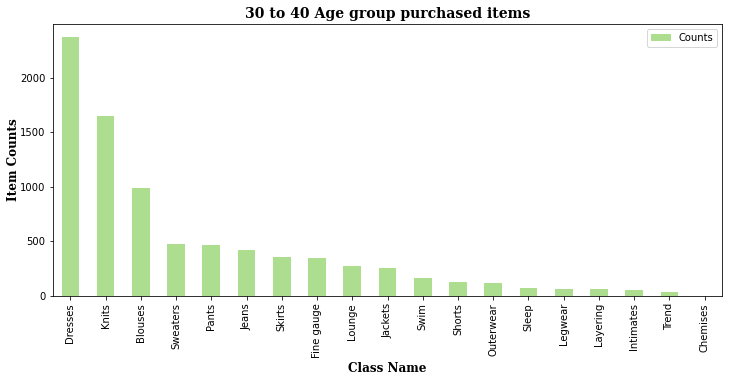

In [24]:
ax1=df1.plot(x='Dresses', y='Counts', kind='bar', figsize=(12, 5),color='#addd8e' )
ax1.set_xlabel('Class Name',fontdict=xfont)

ax1.set_ylabel('Item Counts', fontdict=yfont, labelpad=0, loc='center')

# Setting Title
ax1.set_title('30 to 40 Age group purchased items', fontdict=title_font)

plt.show()

### In Agegroup 30 to 40 Most purchased item is Dressess and least one is chemises

In [25]:
df30to40['review_text'].unique()

array(['Like other reviewers i was hesitant to spend this much on a pair of jeans. however, i purchased them at  20% off on retailer day and...honestly...they look so good i probably would have paid full price. these jeans are fresh!',
       "I absolutely love the retro look of this swimsuit. i first saw it on blogger amber fillerup-clark (barefoot blonde) and i knew i had to have it. this is the first one piece suit i've purchased in about six years. i've avoided one pieces because most of the ones i tried made me feel frumpy, and the mono-kini look just looked odd on me. i have a smaller frame and a larger bust (32ddd), so finding swimsuits that fit properly is a challenge. i am a size 4 but i ordered a size 6 after reading reviews",
       'The sweater is comfortable and a good weight. the zipper is very difficult, but i do not have to unzip the sweater to pull it on.',
       ...,
       'Awesome light shrug. goes with so many out fits, over tees and dresses. tts. get one! orange 

### List out the womens between the age of 20 to 30


In [26]:
df20to30=df.loc[(df['age']>=20)&(df['age']<=30)]

age20to30=df20to30.head()
age20to30

age   division_name department_name class_name  \
13   23         General         Bottoms     Skirts   
38   30  General Petite            Tops    Blouses   
43   23       Initmates        Intimate       Swim   
48   21  General Petite            Tops    Blouses   
63   29         General            Tops    Blouses   

                          title  \
13  Cute, but not flattering on   
38                  Weird arms!   
43                      Amazing   
48                          NaN   
63     Must have, elegant, chic   

                                          review_text  alike_feedback_count  \
13  I really loved this skirt on the model, but it...                     0   
38  The shirt is great except for the arms!! the b...                     0   
43  I'm only 5'3" so i ordered a small but i have ...                     1   
48  I just purchased this blouse in store! the fab...                     4   
63  This top! i was hesitant to try this on becaus...                     3   

    rating  recommend_index   
13       2                 0  
38       3                 0  
43       5                 1  
48       5                 1  
63       5                 1

In [27]:
purchased_20to30=df20to30['class_name'].value_counts()
purchased_20to30
df1=pd.DataFrame(purchased_20to30)
df1 = df1.reset_index()
df1.columns=['Items','Counts']
df1


Items  Counts
0          Dresses     991
1            Knits     659
2          Blouses     393
3            Pants     165
4         Sweaters     160
5           Skirts     141
6            Jeans     133
7       Fine gauge     121
8           Lounge     102
9          Jackets      94
10            Swim      81
11          Shorts      51
12       Intimates      46
13       Outerwear      46
14           Sleep      39
15         Legwear      30
16        Layering      24
17           Trend      14
18  Casual bottoms       2

In [28]:
# Creating Bar plot
fig = px.bar(df1, x="Items", y="Counts", title="20 to 30 Age Group Purchased Items", color="Counts")

# Displaying Bar plot
fig.show()

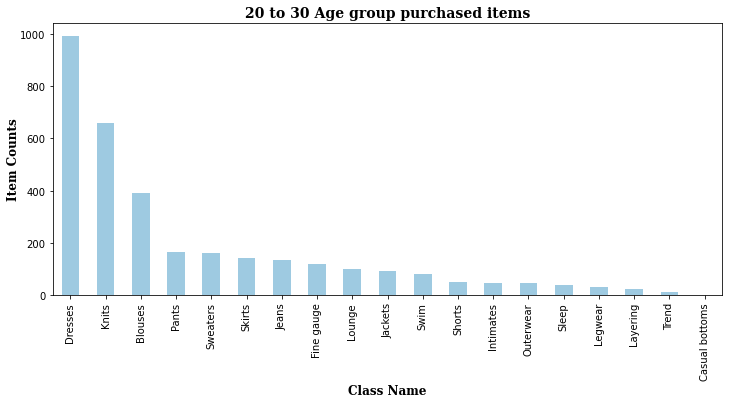

In [29]:
ax2=purchased_20to30.plot(x='class_name', y='Value', kind='bar', figsize=(12, 5),color='#9ecae1')
ax2.set_xlabel('Class Name',fontdict=xfont)

ax2.set_ylabel('Item Counts', fontdict=yfont, labelpad=0, loc='center')

# Setting Title
ax2.set_title('20 to 30 Age group purchased items', fontdict=title_font)

plt.show()

## In Agegroup 20 to 30 Most purchased item is Dressess and least one is casual bottoms

## List out only top rating

In [30]:
df['rating'].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: rating, dtype: int64

In [31]:
dftoprating=df.loc[(df['rating']==5)]
dftoprating


age   division_name department_name class_name  \
0       40         General         Bottoms      Jeans   
1       62  General Petite            Tops    Blouses   
3       45  General Petite         Bottoms      Pants   
4       37       Initmates        Intimate       Swim   
6       83         General            Tops   Sweaters   
...    ...             ...             ...        ...   
23481   44  General Petite         Dresses    Dresses   
23482   39         General         Dresses    Dresses   
23483   29  General Petite            Tops      Knits   
23484   57         General         Dresses    Dresses   
23485   56         General         Jackets    Jackets   

                                       title  \
0                       Amazing fit and wash   
1                         Lovely and unique!   
3                                        Wow   
4                     Great for bigger busts   
6                      Beautiful and unique.   
...                                      ...   
23481                               Love it!   
23482                            Great piece   
23483                 So soft and flattering   
23484  Another winner from isabella sinclair   
23485                                    NaN   

                                             review_text  \
0      Like other reviewers i was hesitant to spend t...   
1      As is true of a bunch of the fall clothing pho...   
3      Love love this! i was hesitant to buy this at ...   
4      I absolutely love the retro look of this swims...   
6      Love this sweater!\r\nsoft and cozy and the ru...   
...                                                  ...   
23481  I oot this dress in the blue. it fits great--h...   
23482  I was very patient with this dress. i was wait...   
23483  The deep v doesn't gape, and flatters the neck...   
23484  I saw this dress online this morning, went int...   
23485  Super cute jacket .perfect for fall i can't st...   

       alike_feedback_count  rating  recommend_index   
0                         0       5                 1  
1                        12       5                 1  
3                         0       5                 1  
4                         0       5                 1  
6                         4       5                 1  
...                     ...     ...               ...  
23481                     0       5                 1  
23482                     1       5                 1  
23483                     0       5                 1  
23484                    10       5                 1  
23485                     0       5                 1  

[13131 rows x 9 columns]

In [32]:
toprating=dftoprating['class_name'].value_counts()
toprating


Dresses           3397
Knits             2589
Blouses           1686
Pants              816
Sweaters           810
Jeans              729
Fine gauge         646
Skirts             544
Jackets            451
Lounge             405
Swim               197
Shorts             183
Outerwear          180
Sleep              142
Legwear            104
Intimates           96
Layering            89
Trend               52
Casual bottoms       1
Name: class_name, dtype: int64

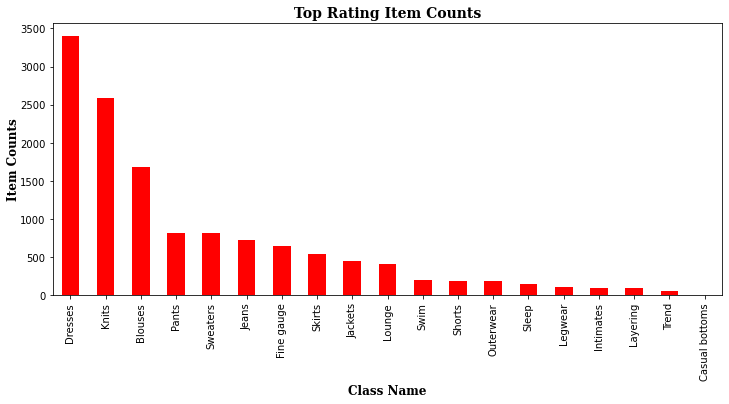

In [33]:
ax=toprating.plot(x='class_name', y='Value', kind='bar', figsize=(12, 5),color='Red')
ax.set_xlabel('Class Name',fontdict=xfont)

ax.set_ylabel('Item Counts', fontdict=yfont, labelpad=0, loc='center')

# Setting Title
ax.set_title('Top Rating Item Counts', fontdict=title_font)

plt.show()

## Low rating

In [34]:
dflow_rating=df.loc[(df['rating']<=2)]

lowrating=dflow_rating['rating'].value_counts()
lowrating

2    1565
1     842
Name: rating, dtype: int64

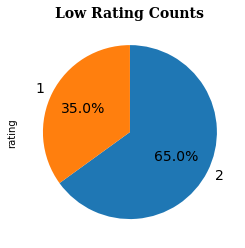

In [35]:
ax=dflow_rating['rating'].value_counts().plot(kind='pie', figsize=(4,4), autopct='%1.1f%%', fontsize=14,counterclock=False,startangle=90)
ax.set_title('Low Rating Counts', fontdict=title_font)
plt.show()

### Low Rating Review

In [36]:
dflow_rating

age   division_name department_name class_name  \
2       47  General Petite         Bottoms     Skirts   
13      23         General         Bottoms     Skirts   
32      56  General Petite            Tops      Knits   
46      32         General            Tops    Blouses   
47      66  General Petite            Tops    Blouses   
...    ...             ...             ...        ...   
23388   50         General            Tops      Knits   
23389   46         General            Tops    Blouses   
23397   48         General         Dresses    Dresses   
23437   58         General         Bottoms      Jeans   
23480   36         General         Dresses    Dresses   

                                          title  \
2                                           Meh   
13                  Cute, but not flattering on   
32     Top part is gorgeous; bottom part is not   
46                                    Awful fit   
47                                      Too bad   
...                                         ...   
23388                          Unflattering fit   
23389       Xl fits small, light blue is pretty   
23397                                    Garish   
23437                              Inconsistent   
23480                                       NaN   

                                             review_text  \
2      I so wanted this skirt to work, love the desig...   
13     I really loved this skirt on the model, but it...   
32     My favorite colors are purple and green, so wh...   
46     Wanted to like this top but it looks terrible ...   
47     I just can't get past how different the blouse...   
...                                                  ...   
23388  This is a rare review for me, i usually love m...   
23389  I ordered the white and the light blue in size...   
23397  This may be the ugliest dress with the worst f...   
23437  I'm not sure what it is with ag. i own at leas...   
23480  I have to agree with the first reviewer! i rea...   

       alike_feedback_count  rating  recommend_index   
2                         3       1                 0  
13                        0       2                 0  
32                        4       2                 0  
46                        0       2                 0  
47                        4       2                 0  
...                     ...     ...               ...  
23388                     0       1                 0  
23389                     3       2                 0  
23397                     8       1                 0  
23437                     5       2                 0  
23480                     2       1                 0  

[2407 rows x 9 columns]

In [37]:
dflow_rating.dropna(inplace=True)

In [38]:
Review_lowrating = ' '.join(dflow_rating["review_text"])
Review_lowrating

'I so wanted this skirt to work, love the design! but, it\'s way, way too long... i am 5, 5, 116lb, and the small is 1 inch on the floor. i step on the skirt as i walk. I really loved this skirt on the model, but it just wasn\'t flattering when i received my order. i ordered two sizes - 2 and 4. i am 5\'4, athletic build and the front closure made my waist look much larger than it is. the back of the skirt also flared out more than i expected it to. \r\n\r\nsadly, i had to return both. perhaps this would look better on someone with a much taller frame. My favorite colors are purple and green, so when i was in the store and saw the beautiful purple flowers on the top of this blouse and all up and down the sleeves, i was was blown away. i was disappointed by the bottom of it, just huge, flowy, green fabric with no design on it whatsoever. i went with my first impression and bought it, but now that i\'m trying it on in the house, i\'m still bothered by the throw-away bottom of this blouse

In [39]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

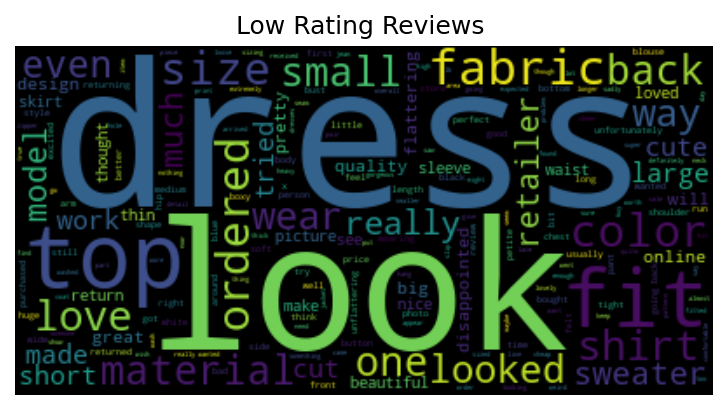

In [40]:
fig = plt.figure(dpi=150)
ax = fig.add_subplot(1, 1, 1)
# Plotting Wordcloud

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(Review_lowrating)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


# Setting Title
ax.set_title('Low Rating Reviews ')
plt.show()

### Histogram for age

In [41]:
# Creating Histogram plot
fig = px.histogram(df, x="age", title="Histogram for age", color_discrete_sequence=["darkblue"])

# Displaying Histogram plot
fig.show()

### Age group 40 👩 has involved in more purchases 

## TopFive class name for overall records

In [42]:
topfive=df['class_name'].value_counts()

top_five=topfive.head(5)

TopFive=top_five.sort_values()
TopFive

Pants       1388
Sweaters    1428
Blouses     3097
Knits       4843
Dresses     6319
Name: class_name, dtype: int64

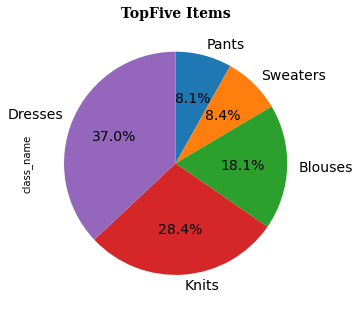

In [43]:

ax=TopFive.plot(kind='pie', figsize=(5, 15), autopct='%1.1f%%', fontsize=14,counterclock=False,startangle=90)
ax.set_title('TopFive Items', fontdict=title_font)
plt.show()

# Percentage of age 

In [44]:
df

age   division_name department_name class_name  \
0       40         General         Bottoms      Jeans   
1       62  General Petite            Tops    Blouses   
2       47  General Petite         Bottoms     Skirts   
3       45  General Petite         Bottoms      Pants   
4       37       Initmates        Intimate       Swim   
...    ...             ...             ...        ...   
23481   44  General Petite         Dresses    Dresses   
23482   39         General         Dresses    Dresses   
23483   29  General Petite            Tops      Knits   
23484   57         General         Dresses    Dresses   
23485   56         General         Jackets    Jackets   

                                       title  \
0                       Amazing fit and wash   
1                         Lovely and unique!   
2                                        Meh   
3                                        Wow   
4                     Great for bigger busts   
...                                      ...   
23481                               Love it!   
23482                            Great piece   
23483                 So soft and flattering   
23484  Another winner from isabella sinclair   
23485                                    NaN   

                                             review_text  \
0      Like other reviewers i was hesitant to spend t...   
1      As is true of a bunch of the fall clothing pho...   
2      I so wanted this skirt to work, love the desig...   
3      Love love this! i was hesitant to buy this at ...   
4      I absolutely love the retro look of this swims...   
...                                                  ...   
23481  I oot this dress in the blue. it fits great--h...   
23482  I was very patient with this dress. i was wait...   
23483  The deep v doesn't gape, and flatters the neck...   
23484  I saw this dress online this morning, went int...   
23485  Super cute jacket .perfect for fall i can't st...   

       alike_feedback_count  rating  recommend_index   
0                         0       5                 1  
1                        12       5                 1  
2                         3       1                 0  
3                         0       5                 1  
4                         0       5                 1  
...                     ...     ...               ...  
23481                     0       5                 1  
23482                     1       5                 1  
23483                     0       5                 1  
23484                    10       5                 1  
23485                     0       5                 1  

[23486 rows x 9 columns]

In [45]:
total = df.shape[0]
total
value=df['age'].value_counts()
value

39    1269
35     909
36     842
34     804
38     780
      ... 
90       2
93       2
86       2
99       2
92       1
Name: age, Length: 77, dtype: int64

In [46]:
agepercent = value.apply(lambda x: (x/total)*100)
agepercent

39    5.403219
35    3.870391
36    3.585115
34    3.423316
38    3.321127
        ...   
90    0.008516
93    0.008516
86    0.008516
99    0.008516
92    0.004258
Name: age, Length: 77, dtype: float64

In [47]:
df1=pd.DataFrame(agepercent)

df1 = df1.reset_index()

df1.columns = ['Age', 'Percentage']
print(df1)

topfive_AgePercentage=df1.head()



    Age  Percentage
0    39    5.403219
1    35    3.870391
2    36    3.585115
3    34    3.423316
4    38    3.321127
..  ...         ...
72   90    0.008516
73   93    0.008516
74   86    0.008516
75   99    0.008516
76   92    0.004258

[77 rows x 2 columns]


In [48]:
# Creating Bar plot
fig = px.bar(df1, x="Age", y="Percentage", title="Percentage of Age", color="Percentage")

# Displaying Bar plot
fig.show()

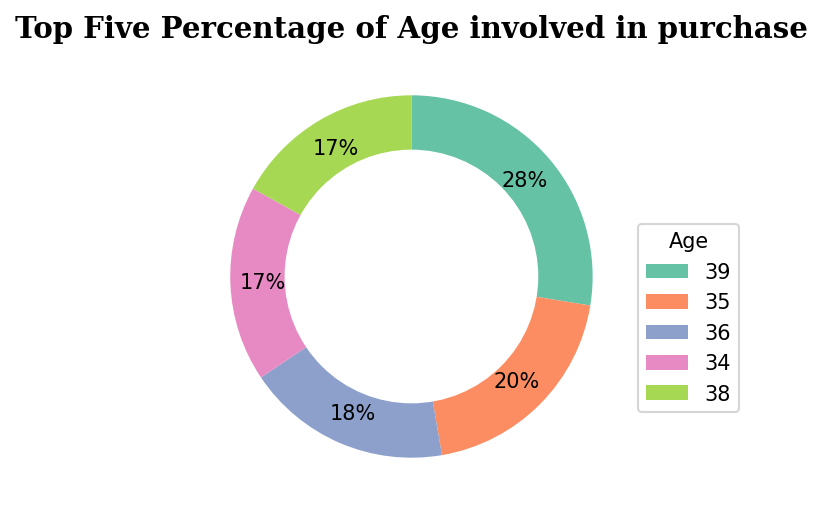

In [49]:
fig = plt.figure(dpi=150)
ax = fig.add_subplot(1, 1, 1)
# Plotting Line
#*******************************************************************
# explode
explode_data = [0.0, 0.05, 0.1, 0.0, 0.0]
# go for qualitative colors
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']
ax.pie(topfive_AgePercentage['Percentage'], autopct='%1.0f%%', counterclock=False, pctdistance=0.82,
colors=colors, startangle=90)
#*******************************************************************
# Adding Center Circle to Make it Donut Chart
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Setting Title
ax.set_title('Top Five Percentage of Age involved in purchase', fontdict=title_font)
ax.legend(topfive_AgePercentage['Age'],loc=(1, 0.2),title='Age')
plt.show()

In [50]:
df.head()

age   division_name department_name class_name                   title  \
0   40         General         Bottoms      Jeans    Amazing fit and wash   
1   62  General Petite            Tops    Blouses      Lovely and unique!   
2   47  General Petite         Bottoms     Skirts                     Meh   
3   45  General Petite         Bottoms      Pants                     Wow   
4   37       Initmates        Intimate       Swim  Great for bigger busts   

                                         review_text  alike_feedback_count  \
0  Like other reviewers i was hesitant to spend t...                     0   
1  As is true of a bunch of the fall clothing pho...                    12   
2  I so wanted this skirt to work, love the desig...                     3   
3  Love love this! i was hesitant to buy this at ...                     0   
4  I absolutely love the retro look of this swims...                     0   

   rating  recommend_index   
0       5                 1  
1       5                 1  
2       1                 0  
3       5                 1  
4       5                 1

## Filter by Bottoms under Department and find out items purchased under this 

In [51]:
df1 = df.loc[df['department_name'] == 'Bottoms']
bottom=df1['class_name'].value_counts()
bottom

Pants             1388
Jeans             1147
Skirts             945
Shorts             317
Casual bottoms       2
Name: class_name, dtype: int64

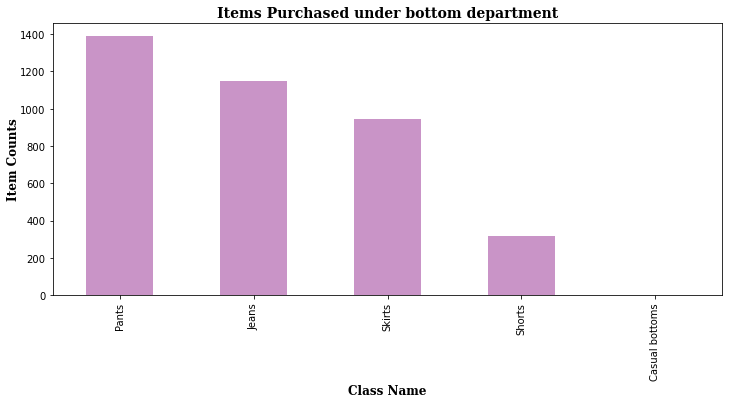

In [52]:
ax=bottom.plot(x='class_name', y='Value', kind='bar', figsize=(12, 5),color='#c994c7')
ax.set_xlabel('Class Name',fontdict=xfont)

ax.set_ylabel('Item Counts', fontdict=yfont, labelpad=0, loc='center')

# Setting Title
ax.set_title('Items Purchased under bottom department', fontdict=title_font)

plt.show()

  ## Filter by intimates under Department and find out items purchased under this

In [53]:
df1 = df.loc[df['department_name'] == 'Intimate']
intimate=df1['class_name'].value_counts()
intimate

Lounge       691
Swim         350
Sleep        228
Legwear      165
Intimates    154
Layering     146
Chemises       1
Name: class_name, dtype: int64

In [54]:
df1=pd.DataFrame(intimate)

df1 = df1.reset_index()

df1.columns = ['Item', 'totalcounts']

df1

Item  totalcounts
0     Lounge          691
1       Swim          350
2      Sleep          228
3    Legwear          165
4  Intimates          154
5   Layering          146
6   Chemises            1

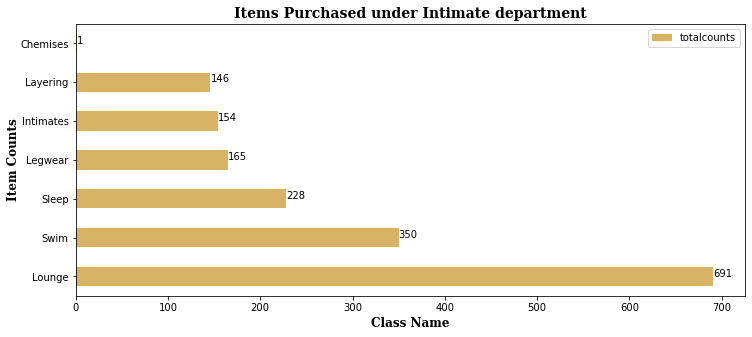

In [55]:
ax=df1.plot(x='Item', y='totalcounts', kind='barh', figsize=(12, 5),color='#d8b365')
ax.set_xlabel('Class Name',fontdict=xfont)

ax.set_ylabel('Item Counts', fontdict=yfont, labelpad=0, loc='center')

# Adding Bar - Horizontal Values
values = df1['totalcounts'].tolist()
for index, value in enumerate(values):
    ax.text(value, index, value)

# Setting Title
ax.set_title('Items Purchased under Intimate department', fontdict=title_font)

plt.show()

In [56]:
df['department_name'].unique()

array(['Bottoms', 'Tops', 'Intimate', 'Jackets', 'Dresses', 'Trend', nan],
      dtype=object)

## Filter by Jackets under Department and find out items purchased under this

In [57]:
df1 = df.loc[df['department_name'] == 'Jackets']
Jackets=df1['class_name'].value_counts()
Jackets

Jackets      704
Outerwear    328
Name: class_name, dtype: int64

##### Jackets 704 Outerwear 328 Under 🧥 Jackets Department

# Filter by Trend under Department division and find out items purchased under this

In [58]:
df1 = df.loc[df['department_name'] == 'Trend']
Trend=df1['class_name'].value_counts()
Trend

Trend    119
Name: class_name, dtype: int64

# Filter by Tops under Department division and find out items purchased under this

In [59]:
df1 = df.loc[df['department_name'] == 'Tops']
Tops=df1['class_name'].value_counts()
Tops

Knits         4843
Blouses       3097
Sweaters      1428
Fine gauge    1100
Name: class_name, dtype: int64

In [60]:
df1=pd.DataFrame(Tops)

df1 = df1.reset_index()

df1.columns = ['Item', 'totalcounts']

df1

Item  totalcounts
0       Knits         4843
1     Blouses         3097
2    Sweaters         1428
3  Fine gauge         1100

In [61]:
# Creating Bar plot
fig = px.bar(df1, x="Item", y="totalcounts", title="Items Purchased under Tops department", color="totalcounts")

# Displaying Bar plot
fig.show()

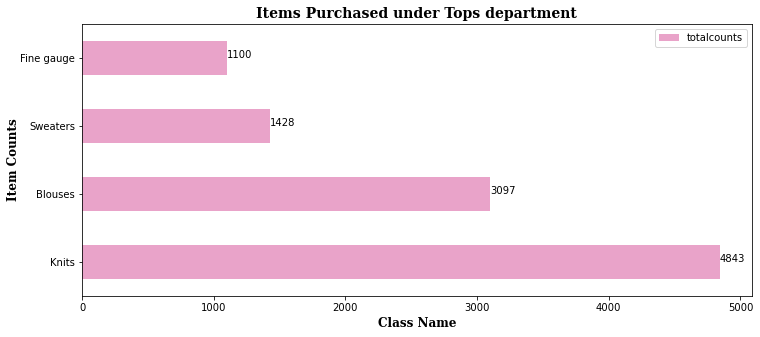

In [62]:
ax=df1.plot(x='Item', y='totalcounts', kind='barh', figsize=(12, 5),color='#e9a3c9')
ax.set_xlabel('Class Name',fontdict=xfont)

ax.set_ylabel('Item Counts', fontdict=yfont, labelpad=0, loc='center')

# Adding Bar - Horizontal Values
values = df1['totalcounts'].tolist()
for index, value in enumerate(values):
    ax.text(value, index, value)

# Setting Title
ax.set_title('Items Purchased under Tops department', fontdict=title_font)

plt.show()

## Filter by Dresses 👗  under Department division and find out items purchased under this

In [63]:
df1 = df.loc[df['department_name'] == 'Dresses']
Dresses=df1['class_name'].value_counts()
Dresses

Dresses    6319
Name: class_name, dtype: int64

#### Total item purchased under Dresses Division is 6319 😊

In [64]:
print(dftoprating.dtypes)

age                      int64
division_name           object
department_name         object
class_name              object
title                   object
review_text             object
alike_feedback_count     int64
rating                   int64
recommend_index          int64
dtype: object


In [65]:
dftoprating.dropna(inplace=True)

In [66]:
topreview=' '.join(dftoprating['title'])
topreview

'Amazing fit and wash Lovely and unique! Wow Great for bigger busts Beautiful and unique. Unique and wonderful Great look all in one Beauty meets comfort Great fit Not red, not orange... Perfect white pants Wowser Great summer staple Great jacket Perfect for irish fest and beyond! Even more vibrant in person! Great top - beautiful details I "heart" this! Fabric is amazing Love this blouse Spring for this dress now! Perfect and at the right price! Amazing Great fall/winter skirt Cute cover-up or summer top & shorts! Great top! Perfect skirt Amazing! Runs small Just beautiful Dressy yet comfy Must have, elegant, chic Worth every penny! Perfect high rise Most comfortable fabric i\'ve ever worn Beautiful and unique. Wow Beautiful summer top! Lovely Great basic! Love the color, design and flow Wonderful Love it! Soft and beautiful! Fun ;) Really, really cute Stylish and understated elegant Size up Forgot to review You need this. Lovely soft colors Great poncho! Adorable Cute but big! Cardig

In [67]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

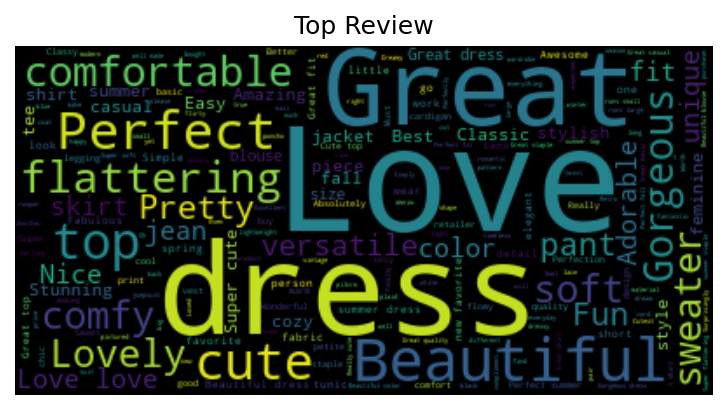

In [68]:
fig = plt.figure(dpi=150)
ax = fig.add_subplot(1, 1, 1)
# Plotting Wordcloud
#*******************************************************************
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(topreview)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#*******************************************************************

# Setting Title
ax.set_title('Top Review')
plt.show()

# Recomended Index and their counts

In [69]:
recomendedIndex = df['recommend_index '].value_counts()
recomendedIndex

1    19314
0     4172
Name: recommend_index , dtype: int64

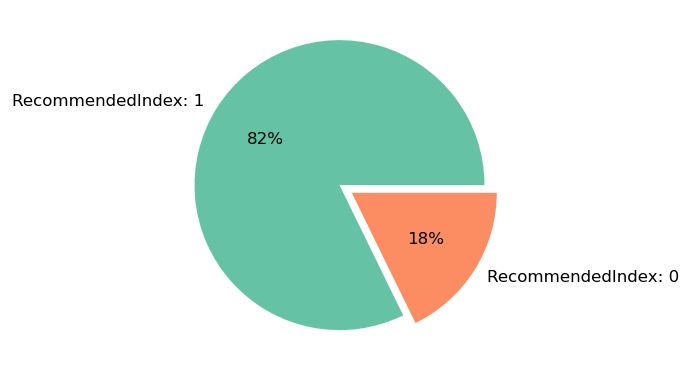

In [70]:
fig = plt.figure(dpi=120)
ax = fig.add_subplot()

# go for qualitative colors
colors = ['#66c2a5', '#fc8d62']
explode_data = [0.1, 0]

labels = [f'RecommendedIndex: {recomment_index}' for recomment_index in recomendedIndex.index]

ax.pie(recomendedIndex.values, autopct='%1.0f%%', explode=explode_data, labels=labels, 
       colors=colors, shadow=False)


plt.show()

# Recomended index and their Items

In [71]:
df1 = df.loc[df['recommend_index '] == 1]
recomended_items=df1['class_name'].value_counts()
recomended_items

Dresses           5107
Knits             3960
Blouses           2509
Pants             1156
Sweaters          1143
Jeans             1011
Fine gauge         921
Skirts             799
Jackets            595
Lounge             594
Swim               282
Outerwear          268
Shorts             266
Sleep              195
Legwear            142
Intimates          132
Layering           129
Trend               88
Casual bottoms       2
Chemises             1
Name: class_name, dtype: int64

In [72]:

df1=pd.DataFrame(recomended_items)

df1 = df1.reset_index()

df1.columns = ['Item', 'totalcounts']

df1

Item  totalcounts
0          Dresses         5107
1            Knits         3960
2          Blouses         2509
3            Pants         1156
4         Sweaters         1143
5            Jeans         1011
6       Fine gauge          921
7           Skirts          799
8          Jackets          595
9           Lounge          594
10            Swim          282
11       Outerwear          268
12          Shorts          266
13           Sleep          195
14         Legwear          142
15       Intimates          132
16        Layering          129
17           Trend           88
18  Casual bottoms            2
19        Chemises            1

In [73]:
# Creating Treemap plot
fig = px.treemap(df1, path=['Item'], values='totalcounts', color='totalcounts', title="Recomended Items and their counts")


                 
# Displaying Treemap plot
fig.show()

## Non Recommended Items and their counts

In [74]:
df1 = df.loc[df['recommend_index '] == 0]
nonrecomended_items=df1['class_name'].value_counts()
nonrecomended_items

Dresses       1212
Knits          883
Blouses        588
Sweaters       285
Pants          232
Fine gauge     179
Skirts         146
Jeans          136
Jackets        109
Lounge          97
Swim            68
Outerwear       60
Shorts          51
Sleep           33
Trend           31
Legwear         23
Intimates       22
Layering        17
Name: class_name, dtype: int64

In [75]:
df1=pd.DataFrame(nonrecomended_items)

df1 = df1.reset_index()

df1.columns = ['Item', 'totalcounts']

df1

Item  totalcounts
0      Dresses         1212
1        Knits          883
2      Blouses          588
3     Sweaters          285
4        Pants          232
5   Fine gauge          179
6       Skirts          146
7        Jeans          136
8      Jackets          109
9       Lounge           97
10        Swim           68
11   Outerwear           60
12      Shorts           51
13       Sleep           33
14       Trend           31
15     Legwear           23
16   Intimates           22
17    Layering           17

In [76]:
# Creating Treemap plot
fig = px.treemap(df1, path=['Item'], values='totalcounts', color='totalcounts', title="Non Recomended Items and their counts")


                 
# Displaying Treemap plot
fig.show()